In [1]:
import pandas as pd
import numpy as np

from collections import defaultdict

import matplotlib.pyplot as plt
jtplot.style(figsize=(25, 7))

# POV. Percent of Volume

In [2]:
df = pd.read_csv('../../../data/order_book/BAC.csv',
                 index_col=0, parse_dates=True)
df.head()

,Bid,Ask,Last,Volume,Type
Time,,,,,
2023-03-08 15:06:21.582,32.85,32.86,32.85,2101.0,Sell
2023-03-08 15:06:21.582,32.85,32.86,32.85,100.0,Sell
2023-03-08 15:06:21.582,32.85,32.86,32.85,100.0,Sell
2023-03-08 15:06:21.582,32.85,32.86,32.85,100.0,Sell
2023-03-08 15:06:21.582,32.85,32.86,32.85,400.0,Sell


In [3]:
df.shape

(100000, 5)

In [4]:
df.iloc[0].name, df.iloc[-1].name

(Timestamp('2023-03-08 15:06:21.582000'),
 Timestamp('2023-03-09 15:00:25.900000'))

In [7]:
df.describe()

,Bid,Ask,Last,Volume
count,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,32.538579,32.548369,32.544547,3.701646e+02
std,0.241542,0.241589,0.241391,1.014503e+04
min,31.910000,31.920000,31.910000,1.000000e+02
25%,32.480000,32.490000,32.490000,1.000000e+02
50%,32.540000,32.550000,32.550000,1.000000e+02
75%,32.740000,32.750000,32.740000,2.990000e+02
max,32.960000,32.970000,32.970000,3.147416e+06


In [6]:
pov_percent = .1
time_window = pd.Timedelta('1min')
order_aggressiveness = 0 # 0-passive, 1-aggresive
max_order_size = .05


execution_log = []
period_stats = []
cumulative_metrics = defaultdict(list)

def calc_order_price(bid, ask, side):
    if order_aggressiveness > 0.7:
        if side == 'BUY':
            return ask * 1.0001
        else:
            return bid * 0.9999
    elif order_aggressiveness > 0.3:
        mid_price = (bid + ask) / 2
        if side == 'BUY':
            return mid_price + (ask - mid_price) * 0.3
        else:
            return mid_price - (mid_price - bid) * 0.3
    else:
        if side == 'BUY':
            return bid + (ask - bid) * 0.1
        else:
            return ask - (ask - bid) * 0.1

calculate_order_price(32.85, 32.86, 'SELL')

32.859

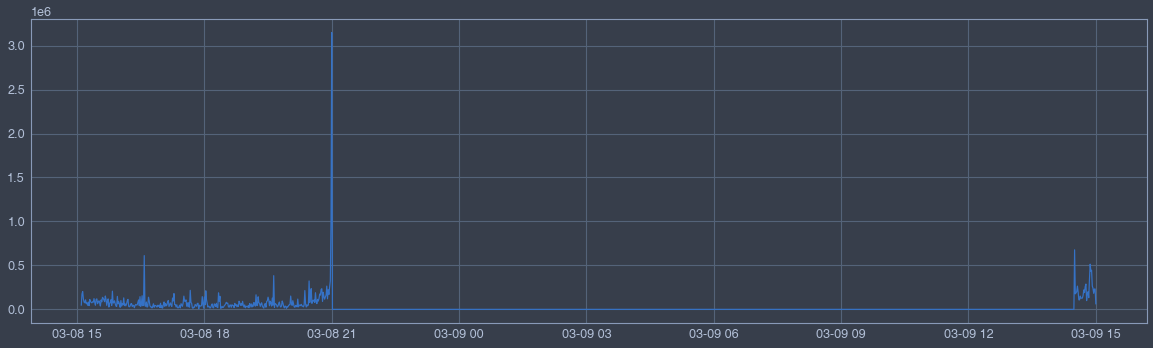

In [16]:
volume_min = df.resample('1min')['Volume'].sum()
plt.plot(volume_min)

In [19]:
volume_min[:10]

Time
2023-03-08 15:06:00     48544.0
2023-03-08 15:07:00    175040.0
2023-03-08 15:08:00    202353.0
2023-03-08 15:09:00    117617.0
2023-03-08 15:10:00     81436.0
2023-03-08 15:11:00     74784.0
2023-03-08 15:12:00    108089.0
2023-03-08 15:13:00     64239.0
2023-03-08 15:14:00     74643.0
2023-03-08 15:15:00     46758.0
Freq: T, Name: Volume, dtype: float64

In [20]:
order_vol = 1_000

pov = .1
int(volume_min[0] * .1 / 100)



48